### Abykeev Sultan
### AIN-2-21

In [ ]:
from sklearn.datasets import load_files
reviews_train = load_files(r"C:\Users\Sultan\Desktop\BigData\train")

text_train, y_train = reviews_train.data, reviews_train.target


In [ ]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [ ]:
reviews_test = load_files(r"C:\Users\Sultan\Desktop\BigData\test")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features = 10000, max_df = .15)
X = vect.fit_transform(text_train)

In [2]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 10, learning_method = "batch", max_iter = 10, random_state = 0)
# Мы строим модель и преобразуем данные в один этап
# Преобразование займет некоторое время,
# и мы можем сэкономить время, выполнив обе операции сразу
document_topics = lda.fit_transform(X)

NameError: ignored

In [ ]:
lda.components_.shape

(10, 10000)

In [3]:
import numpy as np
sorting = np.argsort(lda.components_, axis = 1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

AttributeError: ignored

In [4]:
import mglearn

mglearn.tools.print_topics(topics=range(10), feature_names = feature_names,
sorting = sorting, topics_per_chunk = 5, n_words = 100)

ModuleNotFoundError: ignored

In [5]:
lda100 = LatentDirichletAllocation(n_components = 100, learning_method = "batch", max_iter = 10, random_state = 0)
document_topics100 = lda100.fit_transform(X)

NameError: ignored

In [6]:
import numpy as np

topics = np.array([9,15,20,28,38,46,52,65,71,73,84,93,96,97])

sorting = np.argsort(lda100.components_, axis = 1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.pring_topics(topics = topics, feature_names = feature_names, sorting = sorting, topics_per_chunk = 7, n_words = 20)

AttributeError: ignored

In [ ]:
music = np.argsort(document_topics100[:, :45])(::-1)

for i in music[:10]:
    print(b"".join(text_train[i].split(b".")[:2]) + b".\n")

NameError: ignored

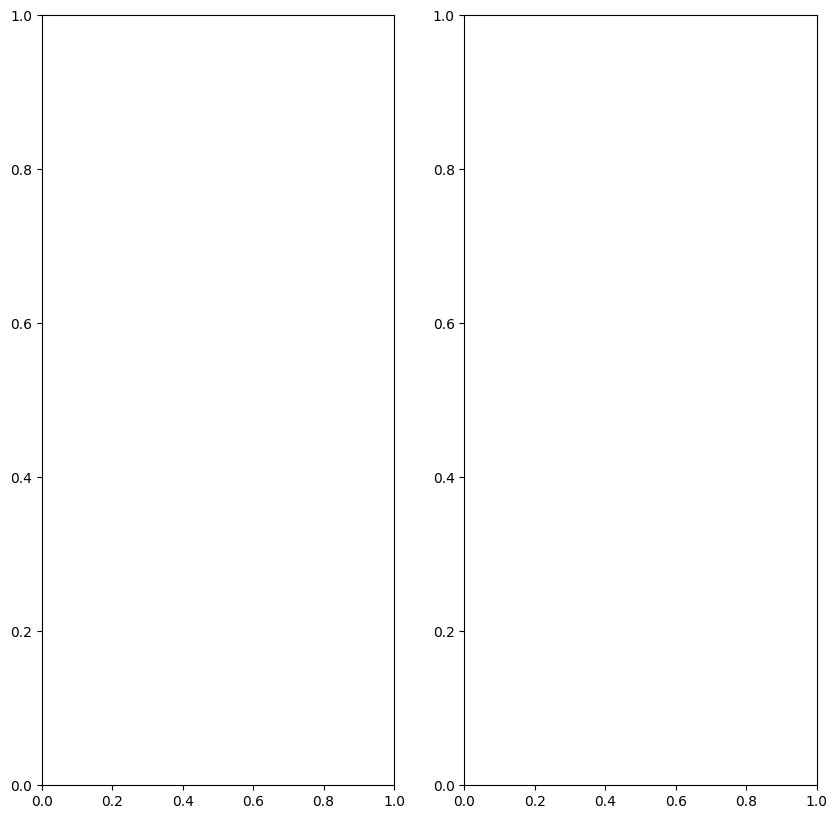

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize = (10, 10))
topic_names = ["{:>2}".format(i) + " ".join(words)
              for i, words in enumerate(feature_names[sorting[:,:2]])]

for col in [0,1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50).np.sum(document_topics100, axis = 0)[start:end])
    ex[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha = "left", va = "top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0,2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad = 130)
plt.tight_layout()

#### 1)Создание мешка слов

In [ ]:
custom_reviews  = [
    "Отличное качество, всегда покупаю этот бренд.",
    "Не понравился товар, бракованный.",
    "Быстрая доставка, все пришло в целости и сохранности.",
    "Удобный в использовании, рекомендую!",
    "Цена слишком высокая, не соответствует качеству.",
    "Надежный продукт, пользуюсь уже много лет.",
    "Отвратительный опыт, товар пришел поврежденный.",
    "Прекрасный выбор, доволен покупкой.",
    "Не оправдал ожидания, не советую.",
    "Отличный сервис, оперативная поддержка.",
    "Эффективный продукт, рекомендую для использования.",
    "Продукция этой компании всегда высокого качества.",
    "Недовольство качеством, не стоит своих денег.",
    "Хорошее соотношение цены и качества.",
    "Надежный бренд, доволен покупкой.",
    "Неудачный опыт, не буду больше покупать у этого производителя.",
    "Инновационный продукт, радует новыми возможностями.",
    "Необычный дизайн, отличается от других аналогов.",
    "Низкое качество, не рекомендую к покупке.",
    "Отличный выбор для повседневного использования.",
]


#### 2) Создание словаря стоп-слов

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stop_words = set(["всегда", "не", "и", "в", "все", "целости", "и", "в", "с", "не",
    "для", "поддержка", "этой", "это", "не", "не", "и", "больше", "у",
    "не", "для", "по", "не", "от", "не", "не", "для", "не", "не", "и",
    "для", "для", "по", "не", "не", "не", "не", "и", "не", "не", "для",
    "не", "не", "не", "не", "для", "повседневного", "использования"])

text_custom = [" ".join(doc.split()) for doc in custom_reviews]
text_custom_no_stop = [" ".join([word for word in doc.split() if word.lower() not in custom_stop_words]) for doc in text_custom]


#### 3) Масштабирование данных с помощью tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(text_custom_no_stop)
y_custom = np.array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])



#### 4) Исследование коэффициентов модели и Выводы по работе

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_tfidf, y_custom)

coefficients = model.coef_[0]
feature_names_tfidf = np.array(tfidf_vectorizer.get_feature_names_out())

for i, word in enumerate(feature_names_tfidf):
    print(f"{word}: {coefficients[i]}")


аналогов: 0.12998105828096523
бракованный: -0.29983249540965473
бренд: 0.24962664447065883
буду: -0.21048350354057407
быстрая: 0.14532324105180014
возможностями: 0.1288524336407127
выбор: 0.2713085255272981
высокая: -0.23267661182414337
высокого: 0.14461041393197804
денег: -0.23267661182414337
дизайн: 0.12998105828096523
доволен: 0.2505823567041045
доставка: 0.14532324105180014
других: 0.12998105828096523
инновационный: 0.1288524336407127
использовании: 0.18527826844757248
использования: 0.2829560778834268
качества: 0.25422953466683273
качество: -0.14068484555254232
качеством: -0.23267661182414337
качеству: -0.23267661182414337
компании: 0.14461041393197804
лет: 0.11606292733139123
много: 0.11606292733139123
надежный: 0.22773011851668265
недовольство: -0.23267661182414337
необычный: 0.12998105828096523
неудачный: -0.21048350354057407
низкое: -0.3010214488658573
новыми: 0.1288524336407127
ожидания: -0.300384214215625
оперативная: 0.14386210064398425
оправдал: -0.300384214215625
опыт: -0

In [ ]:
##Знак коэффициента указывает на направление влияния:
##положительный для положительного влияния, отрицательный - для отрицательного.